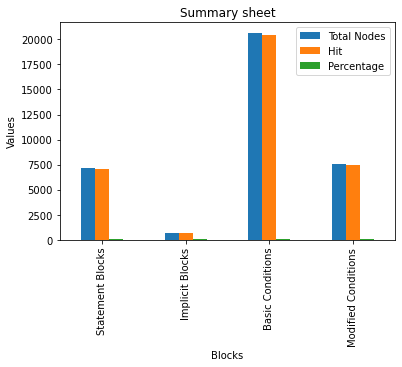

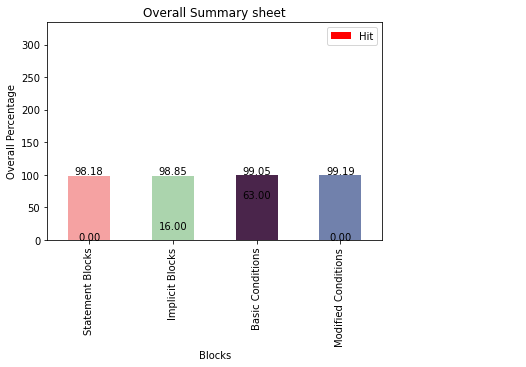

In [10]:
##################################
# Importing the necessary library required
#################################

from tkinter import *
from tkinter.ttk import *
from tkinter import filedialog
from openpyxl.workbook import Workbook
from openpyxl import load_workbook
import pandas as pd
from PIL import ImageTk, Image
from matplotlib import pyplot as plt
import webbrowser
import os
import warnings

warnings.filterwarnings("ignore")

master = Tk()

excel_files = []  # list which contains excel files present in the folder

# sets the geometry of main
# root window
master.title("SCA tool Analysis")
master.geometry("350x330")


# function to open a new window
# on a button click
def openNewWindow():
    df_dict = open_excel(excel_files)
    df = open_excel_dataframe(df_dict)
    plot_graph(df,"file1")


    newdf_dict = second_excel(excel_files)
    df2 = second_dataframe(newdf_dict)
    second_graph(df2, "second")
    
    
    df_dict = open_excel(excel_files)
    new_df = open_excel_dataframe(df_dict)
    percent_graph(new_df,'file1')
    
    f = open('beauty.html', 'w')

    # the html code which will go in the file GFG.html
    html_template = """
    <!DOCTYPE html>
    <html>
    <head>
    <style>
    * {
      box-sizing: border-box;
    }
    .column {
      float: left;
      width: 33.33%;
      padding: 10px;
    }
    /* Clearfix (clear floats) */
    .row::after {
      content: "";
      clear: both;
      display: table;
    }
    </style>
    </head>
    <body>
    <div class="row">
      <div class="column">
        <img src="file1p.png" alt="Percentage" style="width:100%">
      </div>
    </div>
    </body>
    </html>
    """
    # writing the code into the file
    f.write(html_template)

    # close the file
    f.close()

    # 1st method how to open html files in chrome using
    filename = 'file:///'+os.getcwd()+'/' + 'beauty.html'
    webbrowser.open_new_tab(filename)
    


# functioon to select the path of excel files present in the directory
def path_excel():
    global excel_files
    excelExts = [".xlsm"]
    directory = filedialog.askdirectory()
    folderPath.set(directory)
    os.chdir(directory)
    excel_files = [file for file in os.listdir(directory) if os.path.splitext(file)[1].lower() in excelExts]
    filePath_a.set(excel_files[0])
    filePath_b.set(excel_files[1])
    filePath_c.set(excel_files[2])
    filePath_d.set(excel_files[3])


def open_excel(excel_files):
    df_dict = {}
    i = 1
    for f in excel_files:
        df = pd.read_excel(f, sheet_name='Summary', index_col=None)
        df1 = df.loc[0:3]
        # df1.set_index('Unnamed: 0', inplace=True)
        # df1.dropna(inplace=True)
        df_dict[i] = df1
        i = i + 1
    return df_dict


def open_excel_dataframe(df_dict):
    new_df = pd.DataFrame(index=df_dict[1]['Unnamed: 0'], columns=['Total Nodes', 'Hit'])
    new_df.fillna(0, inplace=True)
    for i in range(1, 5):
        df_dict[i].set_index('Unnamed: 0', inplace=True)
        new_df["Total Nodes"] += df_dict[i]['Total Nodes']
        new_df["Hit"] += df_dict[i]['Hit']
    new_df['Percentage']=(new_df['Hit']/ new_df['Total Nodes'])*100
    return new_df



def plot_graph(new_df, imagename):
    new_df.plot(kind="bar")
    # plt.bar(x = "Unnamed :0",y="")
    plt.title("Summary sheet")
    plt.xlabel("Blocks")
    plt.ylabel("Values")
    plt.savefig(imagename + ".png", dpi=300, bbox_inches='tight')


def percent_graph(new_df,imagename):
    ax = new_df['Percentage'].plot(kind="bar",color=['#F5A2A2', '#ABD4AD', '#4A254B', '#7181AC'])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(format(p.get_height(),'.2f'), (x + width/2, y + height*1.02), ha='center')
    plt.title("Overall Summary sheet")
    plt.xlabel("Blocks")
    plt.ylabel("Overall Percentage")
    plt.savefig(imagename + "p.png", dpi=300, bbox_inches='tight')    
    
def second_excel(excel_files):
    newdf_dict = {}
    i = 1
    for f in excel_files:
        df = pd.read_excel(f, sheet_name='Summary', index_col=None)
        df1 = df.loc[9:14]
        df1.set_index('Unnamed: 0', inplace=True)
        df1.drop(columns='Total Nodes', inplace=True)
        newdf_dict[i] = df1
        i = i + 1
    return newdf_dict


def second_dataframe(newdf_dict):
    new_dataframe = pd.DataFrame(index=newdf_dict[1].index, columns=['Hit'])
    new_dataframe.fillna(0, inplace=True)
    for i in range(1, 5):
        new_dataframe["Hit"] += newdf_dict[i]['Hit']
    return new_dataframe


def second_graph(new_dataframe, imagename):
#     my_colors = list('rgbkymc')
    new_dataframe.plot(kind="bar",color=['red', 'blue', 'purple', 'green', 'lavender','orange'])
    plt.title("Summary sheet")
    plt.xlabel("Blocks")
    plt.ylabel("Values")
    plt.savefig(imagename + "s.png", dpi=300, bbox_inches='tight')


folderPath = StringVar()

filePath_a = StringVar()
filePath_b = StringVar()
filePath_c = StringVar()
filePath_d = StringVar()

E1 = Entry(master, textvariable=folderPath)
E1.place(x=120, y=20)
btn1 = Button(master, text="Select the Folder", command=path_excel)
btn1.place(x=10, y=20)
# btn1.pack(pady = 10)


E2 = Entry(master, textvariable=filePath_a)
E2.place(x=120, y=20 + 50)
btn2 = Button(master, text="Graph", command=openNewWindow)
btn2.place(x=200, y=280)
# btn2.pack(pady = 10)


E3 = Entry(master, textvariable=filePath_b)
E3.place(x=120, y=20 + 100)
# btn3 = Button(master, text="Percent Graph", command=openNewWindow1)
# btn3.place(x=75, y=280)
# # btn3.pack(pady = 10)


E4 = Entry(master, textvariable=filePath_c)
E4.place(x=120, y=20 + 150)
# btn4 = Button(master, text ="File3", command = openNewWindow3)
# btn4.place(x=10, y=20+150)
# #btn4.pack(pady = 10)


E5 = Entry(master, textvariable=filePath_d)
E5.place(x=120, y=20 + 200)
# btn5 = Button(master, text ="File4", command = openNewWindow4)
# btn5.place(x=10, y=20+200)
# #btn5.pack(pady = 10)


mainloop()

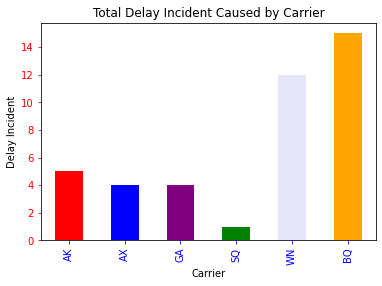

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

s = pd.Series(
    [5, 4, 4, 1, 12,15],
    index = ["AK", "AX", "GA", "SQ", "WN","BQ"]
)

#Set descriptions:
plt.title("Total Delay Incident Caused by Carrier")
plt.ylabel('Delay Incident')
plt.xlabel('Carrier')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

#Plot the data:
# my_colors = list('rgbkymc')  #red, green, blue, black, etc.

s.plot(kind='bar',color=['red', 'blue', 'purple', 'green', 'lavender','orange'])

plt.show()

In [ ]:
for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')